#Аналитическая задача-провести анализ данных с целью выявления портрета клиента, который будет участвовать в экологических мероприятиях(пользоваться нашим приложением) и который не будет участвовать в экологических мероприятиях

##План по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных:
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;





In [39]:
#  Загрузка библиотек
from prettytable import PrettyTable
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal)
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr

In [40]:
#Данные для таблицы

data={'Гендер':['М','М','Ж','Ж',
             'М','Ж','Ж','Ж',
             'Ж','Ж','Ж','М',
             'Ж','Ж','Ж','М',
             'М','М','Ж','Ж',
             'М','М','М','Ж',
             'М','Ж','Ж','Ж',
             'Ж','М','М','М','М',
             'Ж','М','М','Ж',
             'Ж','М','М','М',
             'М','Ж','Ж','М',
             'М','Ж','Ж','Ж',
             'М'],
      'Возраст':[18,23,32,35,61,19,34,20,28,36,42,47,30,58,32,45,53,70,23,37,52,
                 39,40,55,56,25,19,24,38,35,48,68,50,36,52,28,34,29,20,27,31,26,
                 60,40,31,21,25,29,32,21],
      'Семейное положение':['Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Холост/не замужем','Женат/замужем','Женат/замужем',
                            'Женат/замужем','Женат/замужем','Холост/не замужем',
                            'Женат/замужем','Холост/не замужем','Холост/не замужем',
                            'Женат/замужем','Холост/не замужем','Холост/не замужем',
                            'Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Холост/не замужем','Женат/замужем','Женат/замужем',
                            'Женат/замужем','Холост/не замужем','Холост/не замужем',
                            'Холост/не замужем','Холост/не замужем','Холост/не замужем',
                            'Женат/замужем','Женат/замужем','Женат/замужем',
                            'Холост/не замужем','Холост/не замужем','Женат/замужем',
                            'Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Женат/замужем','Холост/не замужем','Женат/замужем',
                            'Женат/замужем','Женат/замужем','Холост/не замужем',
                            'Женат/замужем','Холост/не замужем'],
       'Наличие детей':['Да','Нет','Да','Нет','Да','Да','Да','Да','Нет','Да','Да',
                        'Да','Нет','Нет','Да','Да','Нет','Нет','Нет','Да','Да','Да',
                        'Нет','Да','Да','Нет','Да','Нет','Нет','Нет','Да','Да','Нет',
                        'Нет','Нет','Нет','Да','Да','Да','Да','Нет','Нет','Нет','Да',
                        'Да','Да','Да','Нет','Нет','Нет'],
      'Частота участия в ЭМ в месяц':['1','0','5','3','0','2','1','2','0','10','4',
                        '2','1','0','3','0','0','6','3','4','5','0',
                        '0','3','3','1','2','0','1','0','2','2','0',
                        '1','0','0','2','0','2','3','0','1','4','3',
                        '1','0','2','0','1','1'],
      'Ср.расстояние до места проведения ЭМ':['20','0','50','30','0','70','100',
                        '70','0','100','50',
                        '30','20','0','30','0','0','70','20','20','30','0',
                        '0','50','20','50','70','0','100','0','40','50','0',
                        '1','0','0','2','0','2','3','0','1','4','3',
                        '100','0','50','0','40','70'],
      'Образование':['Высшее','Среднее','Высшее','Высшее','Среднее','Высшее','Среднее',
                     'Среднее спец','Высшее','Среднее спец','Высшее','Среднее','Среднее спец',
                     'Высшее','Среднее','Высшее','Среднее спец','Высшее','Высшее',
                     'Среднее','Высшее','Среднее','Высшее','Высшее','Среднее спец',
                     'Высшее','Среднее','Высшее','Высшее','Среднее спец','Высшее',
                     'Среднее','Высшее','Высшее','Среднее спец','Высшее',
                     'Среднее спец','Высшее','Высшее','Высшее','Высшее',
                     'Среднее спец','Высшее','Высшее','Высшее','Высшее','Среднее',
                     'Высшее','Высшее','Высшее'],
      'Доход':[44000,20000,247000,145000,30000,450000,68000,88000,110000,15000,
               41000,50000,150000,71000,19000,110000,90000,70000,23000,80000,90000,
                 230000,190000,55000,134000,190000,210000,305000,400000,35000,
               480000,120000,50000,36000,90000,128000,150000,29000,220000,170000,
               140000,100000,29000,80000,90000,60000,29000,130000,150000,75000],
      'Участие в соц.сетях':['Да','Нет','Да','Нет','Да','Да','Да','Да','Нет','Да','Да',
                        'Да','Нет','Нет','Да','Да','Нет','Нет','Нет','Да','Да','Да',
                        'Да','Нет','Нет','Да','Нет','Да','Да','Нет','Да','Нет','Да',
                        'Нет','Нет','Нет','Да','Да','Да','Да','Нет','Нет','Нет','Да',
                        'Да','Нет','Да','Нет','Да','Да']}

#Создаем DataFrame
#df=pd.DataFrame(data)

In [41]:
#Создаем DataFrame
df=pd.DataFrame(data)
x=PrettyTable()
x.field_names=df.columns.tolist()
for row in df.itertuples(index=False):
  x.add_row(row)
print(x)

+--------+---------+--------------------+---------------+------------------------------+--------------------------------------+--------------+--------+---------------------+
| Гендер | Возраст | Семейное положение | Наличие детей | Частота участия в ЭМ в месяц | Ср.расстояние до места проведения ЭМ | Образование  | Доход  | Участие в соц.сетях |
+--------+---------+--------------------+---------------+------------------------------+--------------------------------------+--------------+--------+---------------------+
|   М    |    18   |   Женат/замужем    |       Да      |              1               |                  20                  |    Высшее    | 44000  |          Да         |
|   М    |    23   | Холост/не замужем  |      Нет      |              0               |                  0                   |   Среднее    | 20000  |         Нет         |
|   Ж    |    32   |   Женат/замужем    |       Да      |              5               |                  50                  |   

In [42]:
#сохраняем таблицу
df.to_csv('Participants.csv',index=False,encoding='utf-8')

In [44]:
df.head(10)

,Гендер,Возраст,Семейное положение,Наличие детей,Частота участия в ЭМ в месяц,Ср.расстояние до места проведения ЭМ,Образование,Доход,Участие в соц.сетях
0,М,18,Женат/замужем,Да,1,20,Высшее,44000,Да
1,М,23,Холост/не замужем,Нет,0,0,Среднее,20000,Нет
2,Ж,32,Женат/замужем,Да,5,50,Высшее,247000,Да
3,Ж,35,Женат/замужем,Нет,3,30,Высшее,145000,Нет
4,М,61,Холост/не замужем,Да,0,0,Среднее,30000,Да
5,Ж,19,Женат/замужем,Да,2,70,Высшее,450000,Да
6,Ж,34,Холост/не замужем,Да,1,100,Среднее,68000,Да
7,Ж,20,Женат/замужем,Да,2,70,Среднее спец,88000,Да
8,Ж,28,Женат/замужем,Нет,0,0,Высшее,110000,Нет
9,Ж,36,Женат/замужем,Да,10,100,Среднее спец,15000,Да


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Гендер                                50 non-null     object
 1   Возраст                               50 non-null     int64 
 2   Семейное положение                    50 non-null     object
 3   Наличие детей                         50 non-null     object
 4   Частота участия в ЭМ в месяц          50 non-null     object
 5   Ср.расстояние до места проведения ЭМ  50 non-null     object
 6   Образование                           50 non-null     object
 7   Доход                                 50 non-null     int64 
 8   Участие в соц.сетях                   50 non-null     object
dtypes: int64(2), object(7)
memory usage: 3.6+ KB


In [46]:
#корректируем типы данных
df = df.astype({'Частота участия в ЭМ в месяц': 'int64',
               'Ср.расстояние до места проведения ЭМ': 'int64',
                'Частота участия в ЭМ в месяц': 'float64'},
          errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Гендер                                50 non-null     object 
 1   Возраст                               50 non-null     int64  
 2   Семейное положение                    50 non-null     object 
 3   Наличие детей                         50 non-null     object 
 4   Частота участия в ЭМ в месяц          50 non-null     float64
 5   Ср.расстояние до места проведения ЭМ  50 non-null     int64  
 6   Образование                           50 non-null     object 
 7   Доход                                 50 non-null     int64  
 8   Участие в соц.сетях                   50 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [47]:
#поиск дублирующих записей
df.duplicated()
print(f'''В наборе данных {df.duplicated().sum()}дублей''')

В наборе данных 0дублей


In [48]:
# Поиск аномальных значений
# разделим признаки на непрерывные и категориальные

lst_cont = ['Возраст','Частота участия в ЭМ в месяц',
            'Доход','Ср.расстояние до места проведения ЭМ']

lst_disc = ['Гендер','Семейное положение','Наличие детей','Участие в ЭМ',
             'Образование', 'Участие в соц.сетях']

<ipython-input-49-14ace9c5078b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index_fig)
<ipython-input-49-14ace9c5078b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-49-14ace9c5078b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-49-14ace9c5078b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-49-14ace9c5078b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),
<ipython-input-49-14ace9c5078b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two 

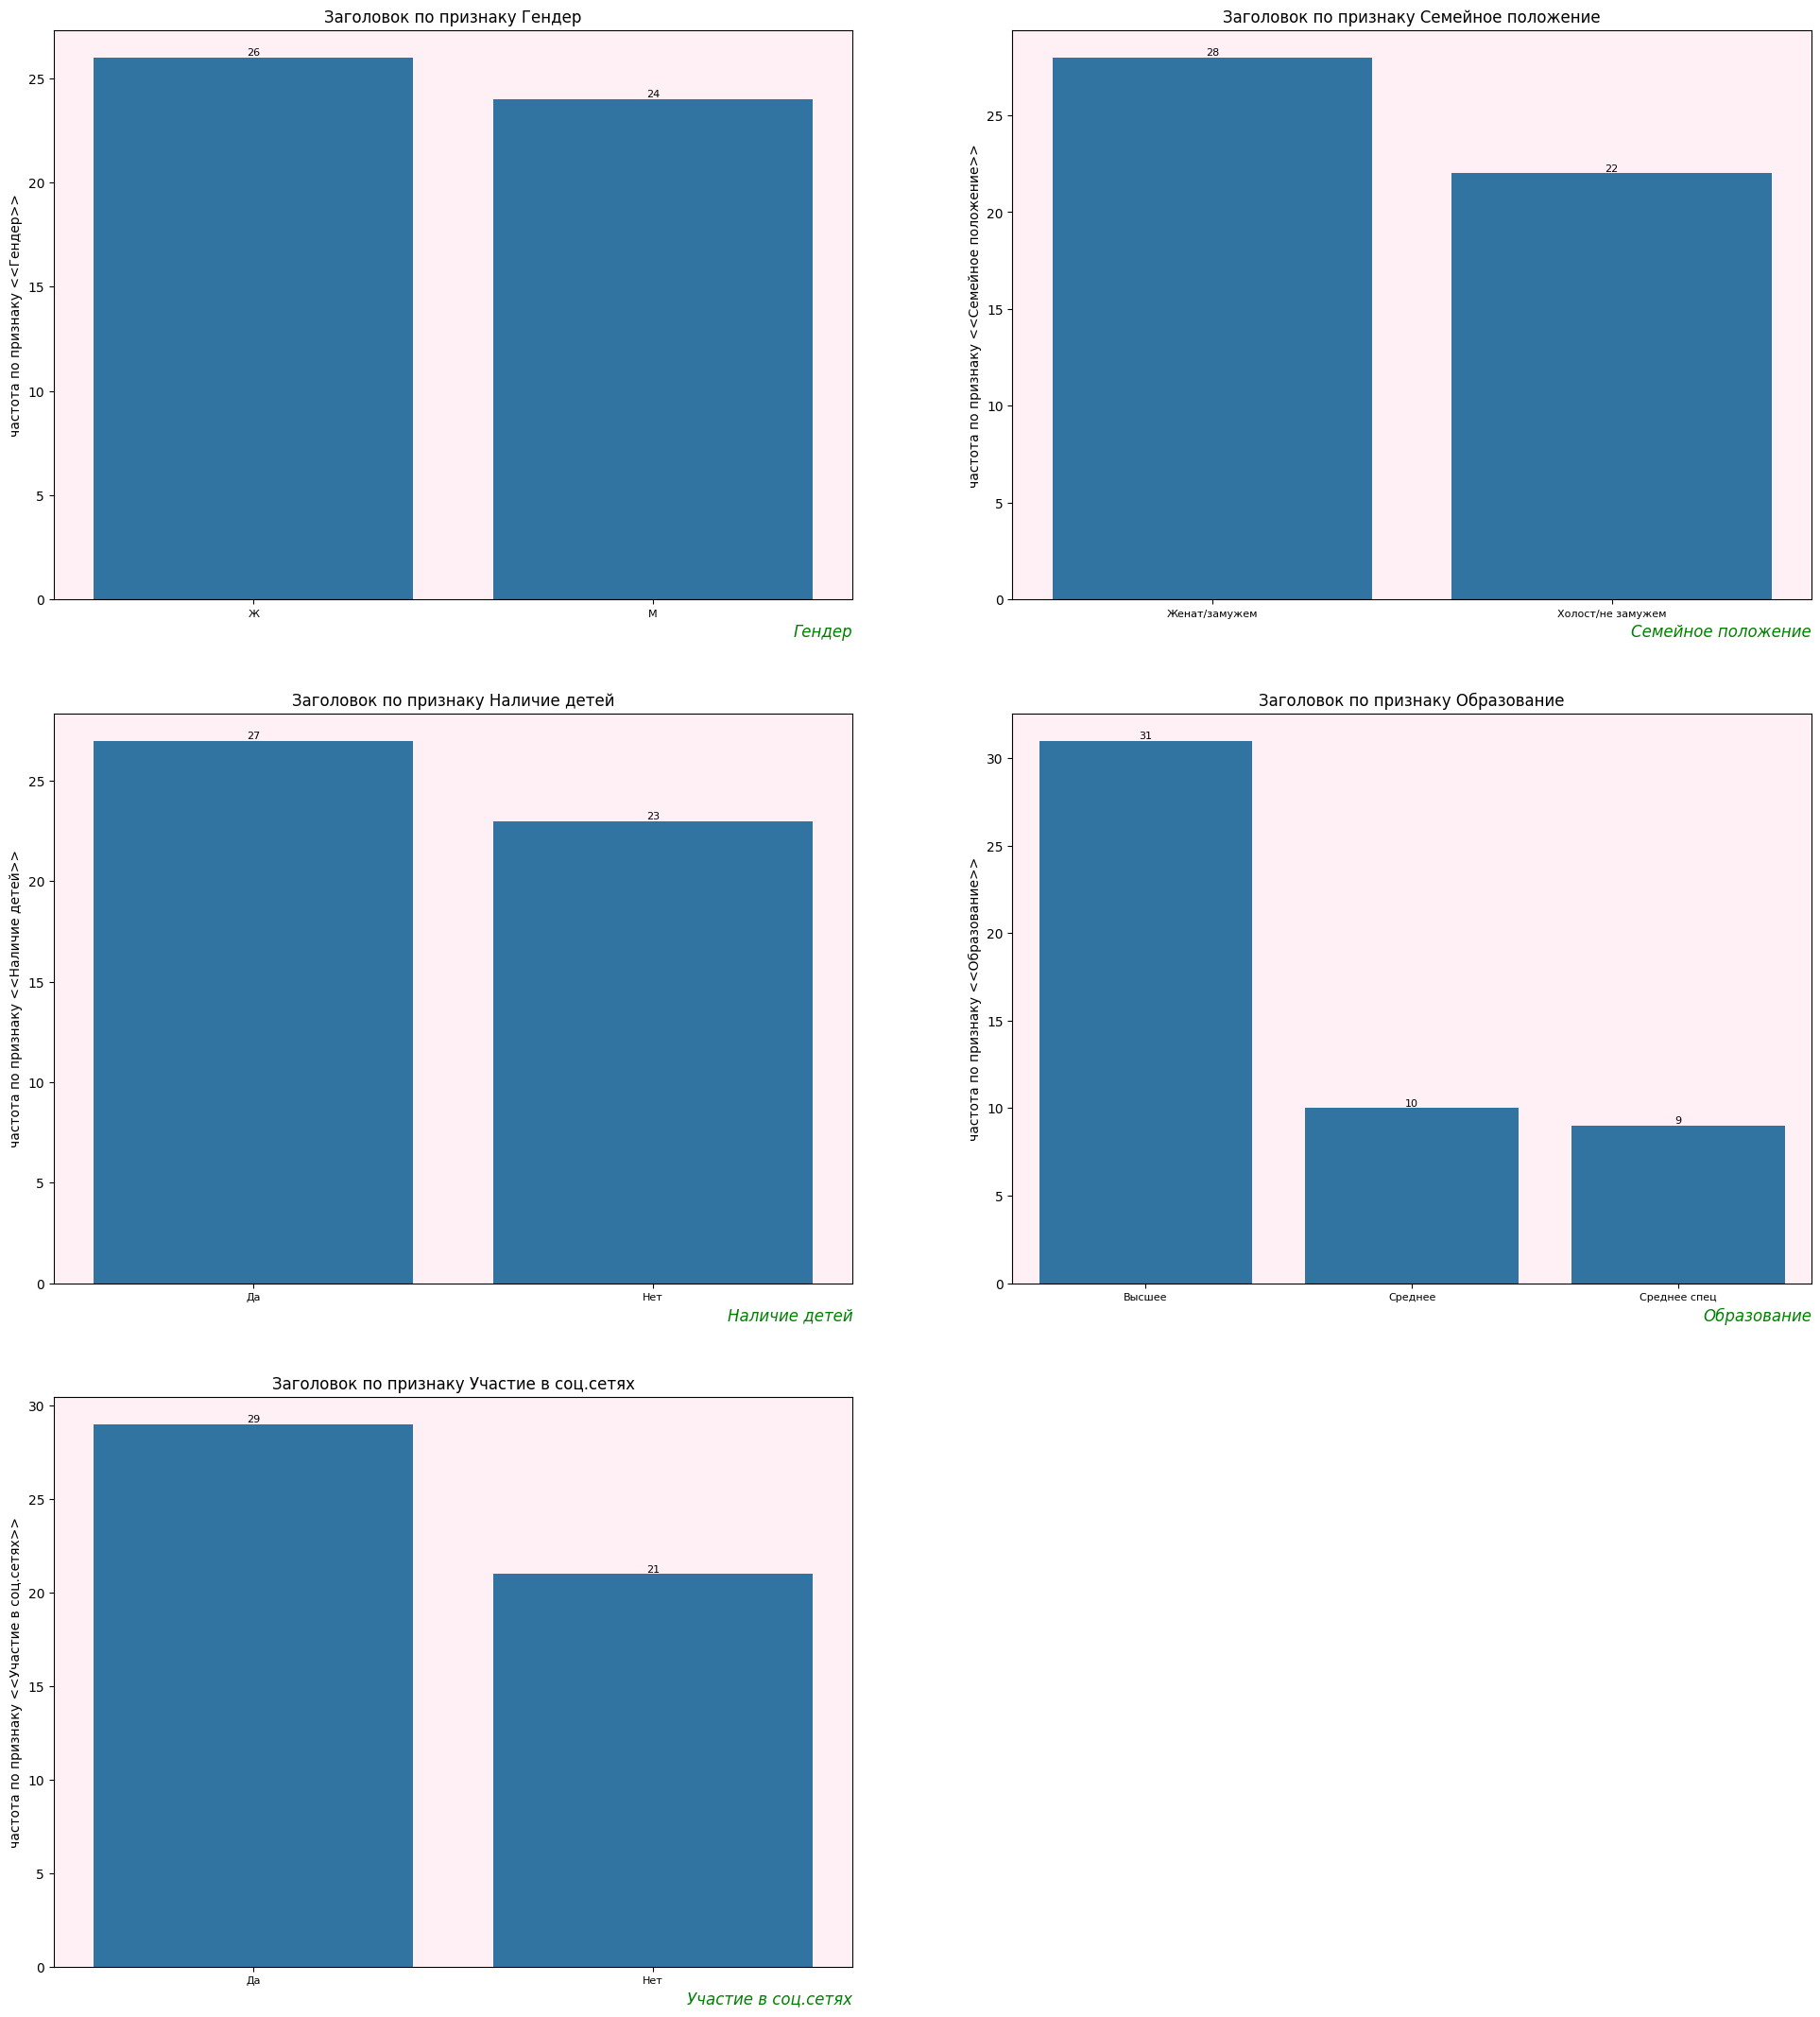

In [49]:
#построим столбиковые диаграммы для категориальных признаков через цикл for

lst_disc = ['Гендер','Семейное положение','Наличие детей',
             'Образование', 'Участие в соц.сетях']

plt.subplots(2, figsize=(24, 36))
for index_fig, col in enumerate(lst_disc, start=1):
    plt.subplot(4, 2, index_fig)
    if col == 'Пол':
        my_angle = 45
    else:
        my_angle = 0
    ax = sns.countplot(data=df,
                       x=col,
                       order=list(df[col].value_counts().index));
    ax.set_xlabel(col, # подпись по оси абцисс
            fontsize=12, # размер шрифта
            fontstyle='italic', # стиль шрифта
            color='green', # цвет шрифта
            loc = 'right' # размещение подписи
                );
    ax.set_ylabel(f'частота по признаку <<{col}>>');
    ax.set_title(f'Заголовок по признаку {col}');
    ax.set_facecolor('lavenderblush')
    # работа с подписями по оси
    ax.set_xticklabels(ax.get_xticklabels(),
                    fontsize=8,
                    rotation=my_angle);

    for container in ax.containers:
        ax.bar_label(container, fontsize=8);
    if index_fig == 6:
        break

#Промежуточный вывод: Среди потенциальных клиентов клиентов со статусом женат/замужем больше чем со статусом не женат/не замужем
# Среди потенциальных клиентов клиентов с признаком "Наличие детей" больше
# Также потенциальных клиентов с высшим образованием больше
#И участников соц.сетей преобладает над теми кто неипользуется соц.сетями
#Респодентов по половой принадлежности примерно одинаково (М-24, Ж-26)

In [50]:
# функция для расчета границ усов
# непрерывных числовых признаков
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

<ipython-input-51-4e6a21aa6b42>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-51-4e6a21aa6b42>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-51-4e6a21aa6b42>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)
<ipython-input-51-4e6a21aa6b42>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2*index_fig + 1)


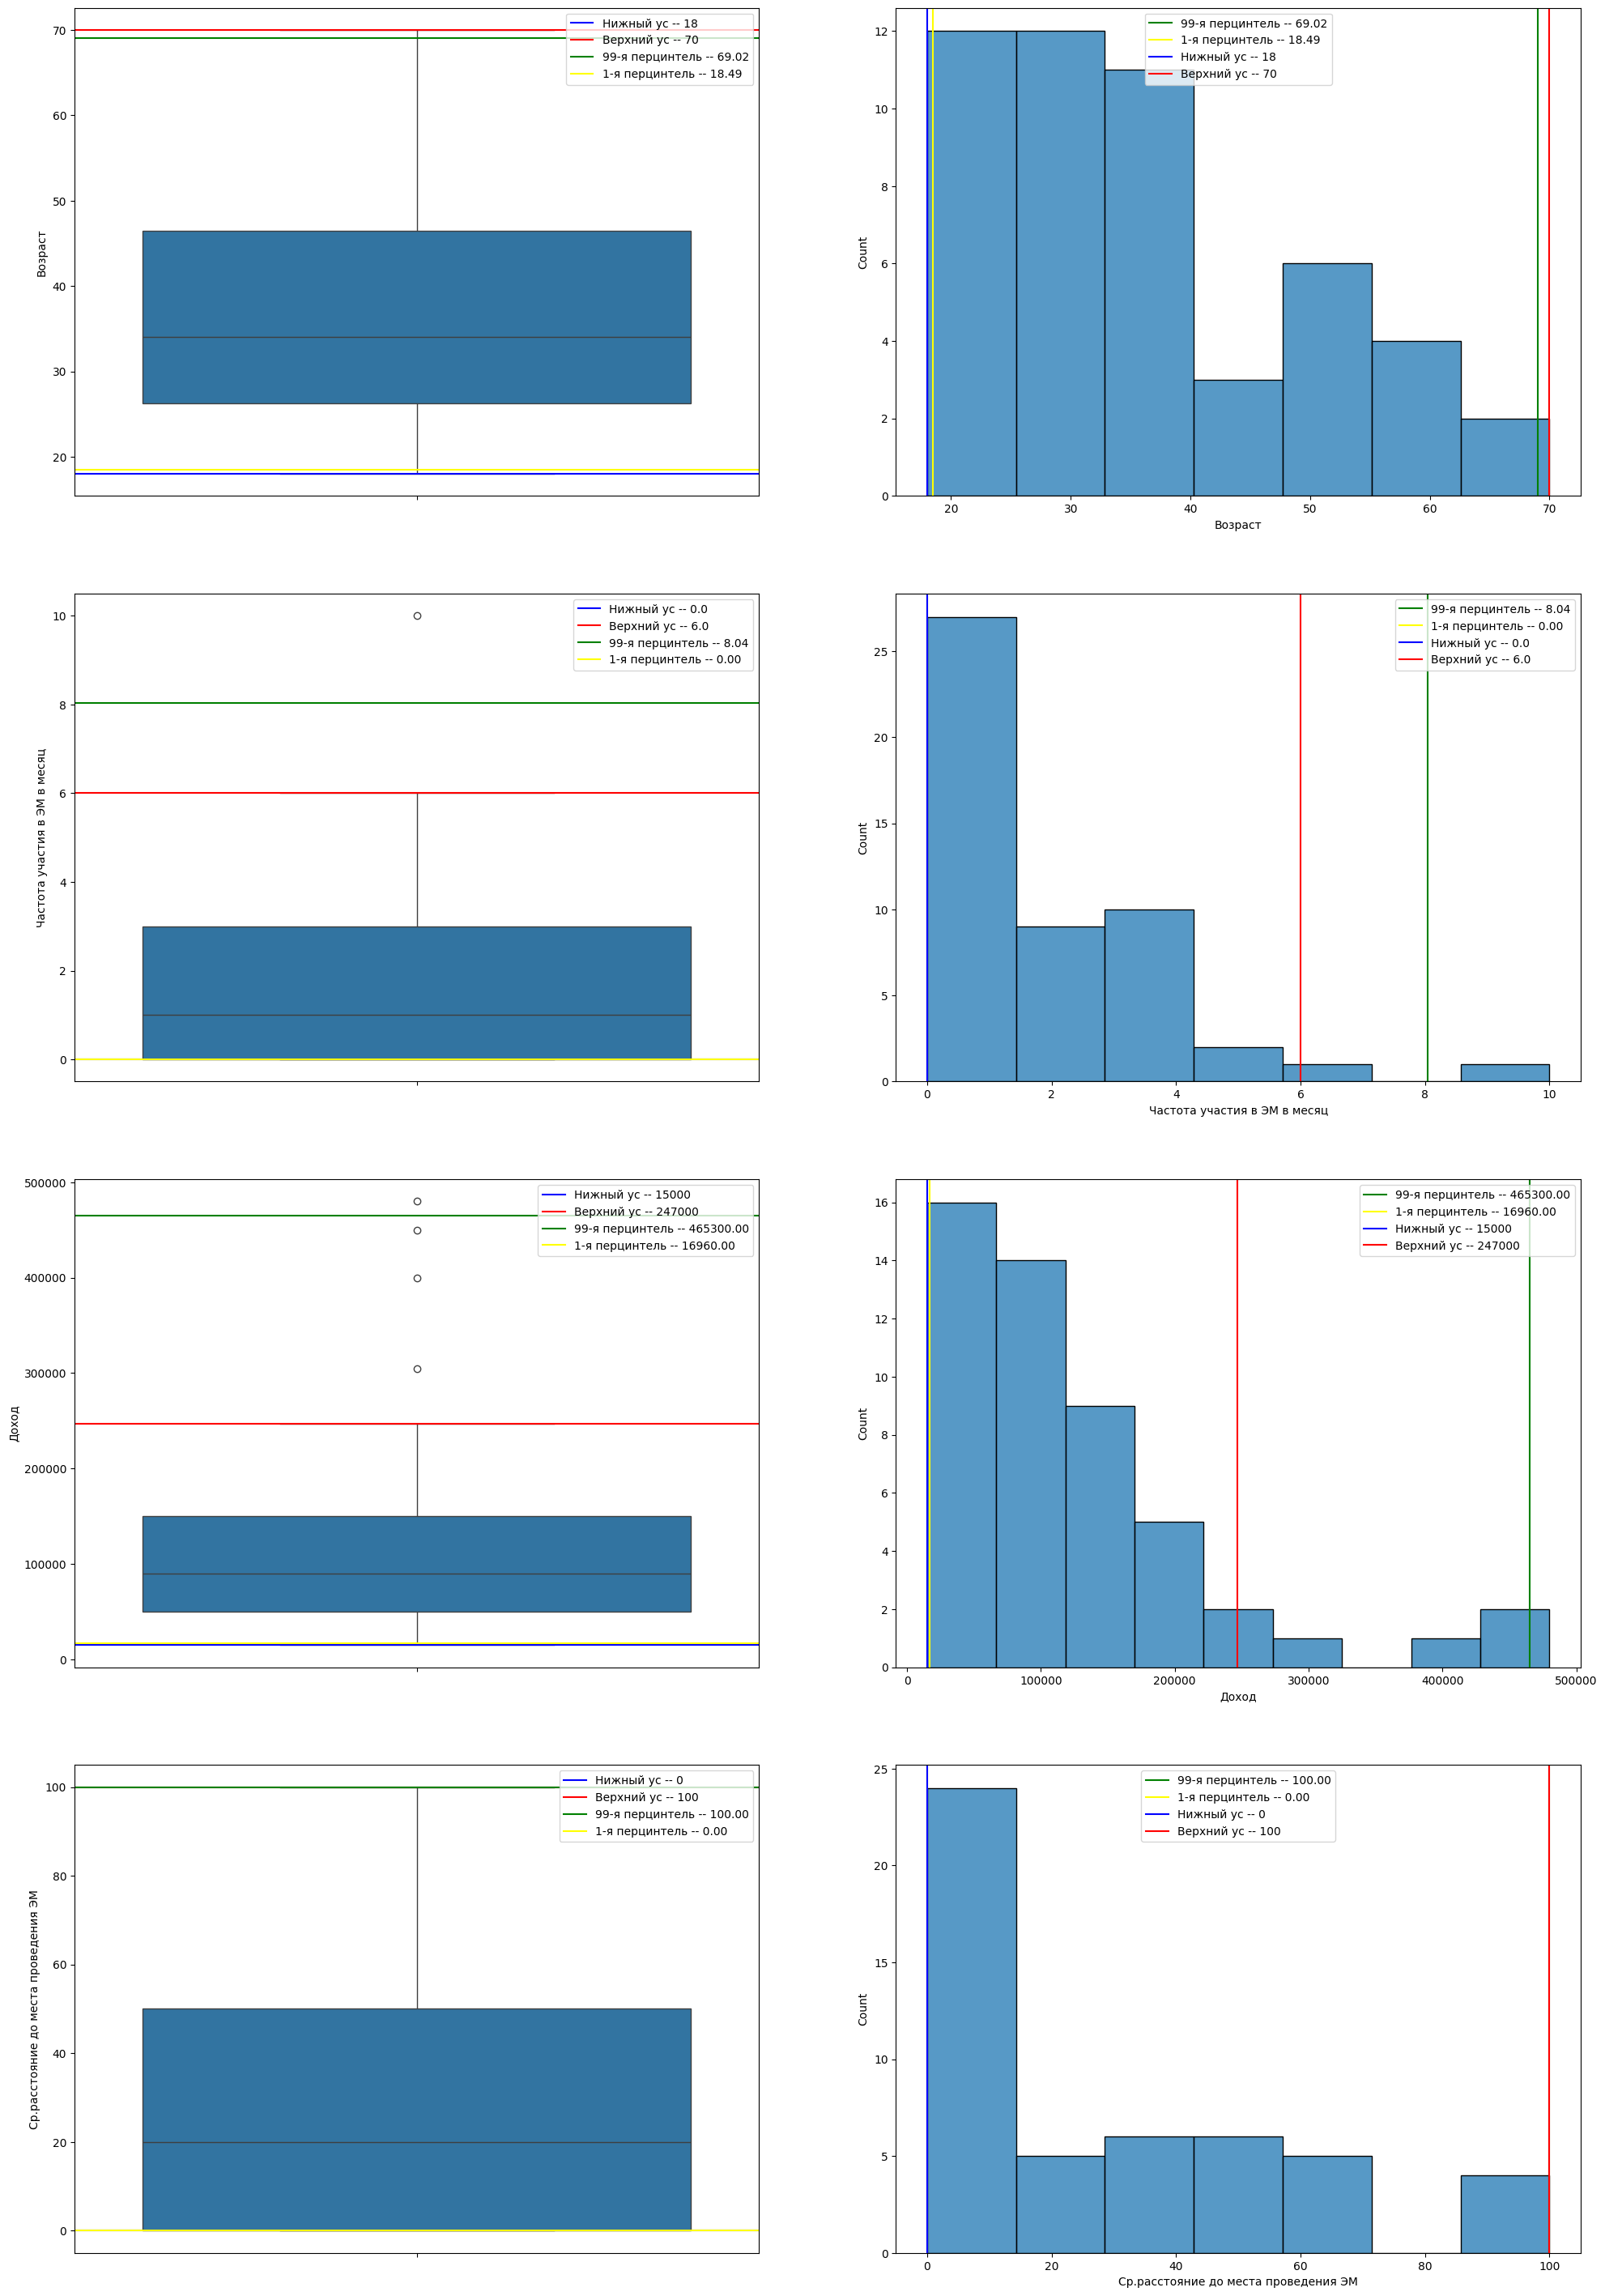

In [51]:
#Построим "ящики с усами" и график плотности распределения для непрерывных признаков
plt.subplots(4, figsize=(24, 36))
for index_fig, col in enumerate(lst_cont, start=0):
    plt.subplot(4, 2, 2*index_fig + 1)
    ax = sns.boxplot(data=df,
                 y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axhline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axhline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axhline(q_99,
               color='green',
               label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axhline(q_1, color='yellow',
               label=f'1-я перцинтель -- {q_1:.2f}')
    plt.legend()
    plt.subplot(4, 2, 2*index_fig + 2)
    ax = sns.histplot(df[col]);
    q_99 = np.percentile(df[col].dropna(), 99)
    ax.axvline(q_99,
            color='green',
            label=f'99-я перцинтель -- {q_99:.2f}')
    q_1 = np.percentile(df[col].dropna(), 1)
    ax.axvline(q_1,
            color='yellow',
            label=f'1-я перцинтель -- {q_1:.2f}')
    actual_loval, actual_hival = calc_boxplot(df[col])
    ax.axvline(actual_loval,
               color='blue',
               label=f'Нижный ус -- {actual_loval}')
    ax.axvline(actual_hival, color='red',
               label=f'Верхний ус -- {actual_hival}')

    plt.legend()

In [52]:
# просмотр описательных статистик для непрерывных признаков
per = [0.01, 0.85, 0.99]
df.describe(percentiles=per)
#в нашем датасете 50 участников с минимальным возрастом 18 лет и максимальным-70 лет,
#с минимальным доходом в 15тыс.р. и максимальной суммой дохода в 480тыс.р.
#Суммы в 15тыс.р. и 480тыс.р. выглядят как аномалии(предварительно)

,Возраст,Частота участия в ЭМ в месяц,Ср.расстояние до места проведения ЭМ,Доход
count,50.000000,50.000000,50.000000,50.000000
mean,36.680000,1.740000,27.320000,122320.000000
std,13.677689,1.977527,32.269553,105861.372578
min,18.000000,0.000000,0.000000,15000.000000
1%,18.490000,0.000000,0.000000,16960.000000
50%,34.000000,1.000000,20.000000,90000.000000
85%,52.650000,3.000000,70.000000,203000.000000
99%,69.020000,8.040000,100.000000,465300.000000
max,70.000000,10.000000,100.000000,480000.000000


In [17]:
# функция для расчета границ усов
# непрерывных числовых признаков
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

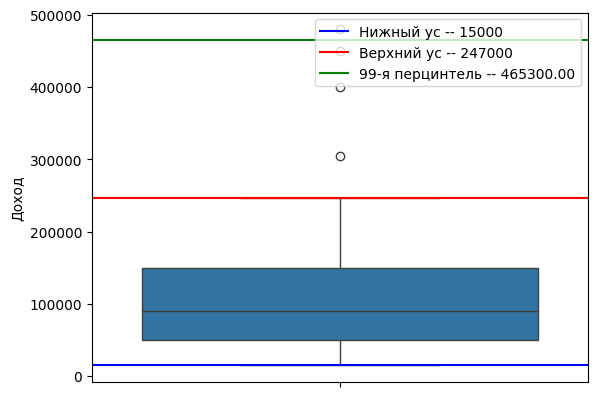

In [53]:
# Построим для признака "Доход" "ящик с усами"

ax = sns.boxplot(data=df,
                 y='Доход')
actual_loval, actual_hival = calc_boxplot(df['Доход'])
ax.axhline(actual_loval,
           color='blue',
           label=f'Нижный ус -- {actual_loval}')
ax.axhline(actual_hival,
           color='red',
           label=f'Верхний ус -- {actual_hival}')

q_99 = np.percentile(df['Доход'].dropna(), 99)
ax.axhline(q_99,
           color='green',
           label=f'99-я перцинтель -- {q_99:.2f}')
plt.legend()


# вывод у 99 % клиентов доход не выше 465300р.Явных аномалий не обнаружено

In [54]:
#Формула Стержица для подсчета бинов
import math
1+3.322*math.log(50)

13.9957404240323

<Axes: xlabel='Доход', ylabel='Count'>

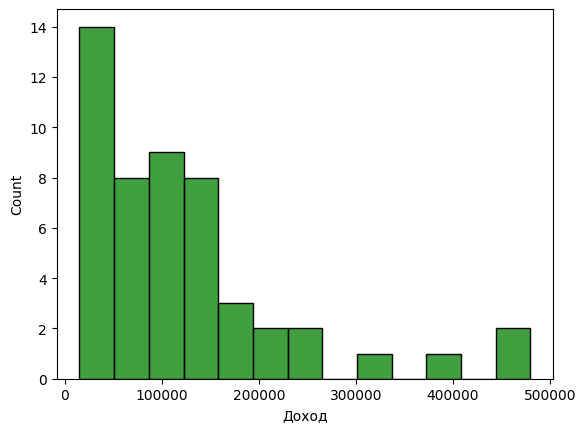

In [55]:
#Построим функцию плотности для признака 'Доход'
sns.histplot(data=df,
             x=df['Доход'],
             color='green',
             label=f'Доход',
             bins=13)

In [56]:
# пропущенные значения
df.isnull().sum()
print(f'''Количество пропущенных значений в наборе данных {df.isnull().sum()}''')

Количество пропущенных значений в наборе данных Гендер                                  0
Возраст                                 0
Семейное положение                      0
Наличие детей                           0
Частота участия в ЭМ в месяц            0
Ср.расстояние до места проведения ЭМ    0
Образование                             0
Доход                                   0
Участие в соц.сетях                     0
dtype: int64


In [57]:
# Шаг 3. Провести исследовательский анализ данных:
# исследовать распределения признаков;
# исследовать возможные зависимости между признаками;

In [58]:
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df[lst_cont].describe(percentiles=per)
#Вывод если сравнивать данные в группе min,1% и 5% то наблюдаем плавный рост показателей
#Если сравнивать данные в группе 95%,99% и max то наблюдаем плавный рост показателей

,Возраст,Частота участия в ЭМ в месяц,Доход,Ср.расстояние до места проведения ЭМ
count,50.000000,50.000000,50.000000,50.000000
mean,36.680000,1.740000,122320.000000,27.320000
std,13.677689,1.977527,105861.372578,32.269553
min,18.000000,0.000000,15000.000000,0.000000
1%,18.490000,0.000000,16960.000000,0.000000
5%,19.450000,0.000000,21350.000000,0.000000
25%,26.250000,0.000000,50000.000000,0.000000
50%,34.000000,1.000000,90000.000000,20.000000
75%,46.500000,3.000000,150000.000000,50.000000
95%,60.550000,5.000000,357250.000000,100.000000


In [59]:
# исследовать возможные зависимости между признаками;
# проведем корреляционный анализ
# для предварительного анализа следует начать с построения диаграмм рассеивания


lst_columns =['Возраст', 'Частота участия в ЭМ в месяц',
              'Ср.расстояние до места проведения ЭМ','Доход']

In [60]:
df.columns

Index(['Гендер', 'Возраст', 'Семейное положение', 'Наличие детей',
       'Частота участия в ЭМ в месяц', 'Ср.расстояние до места проведения ЭМ',
       'Образование', 'Доход', 'Участие в соц.сетях'],
      dtype='object')

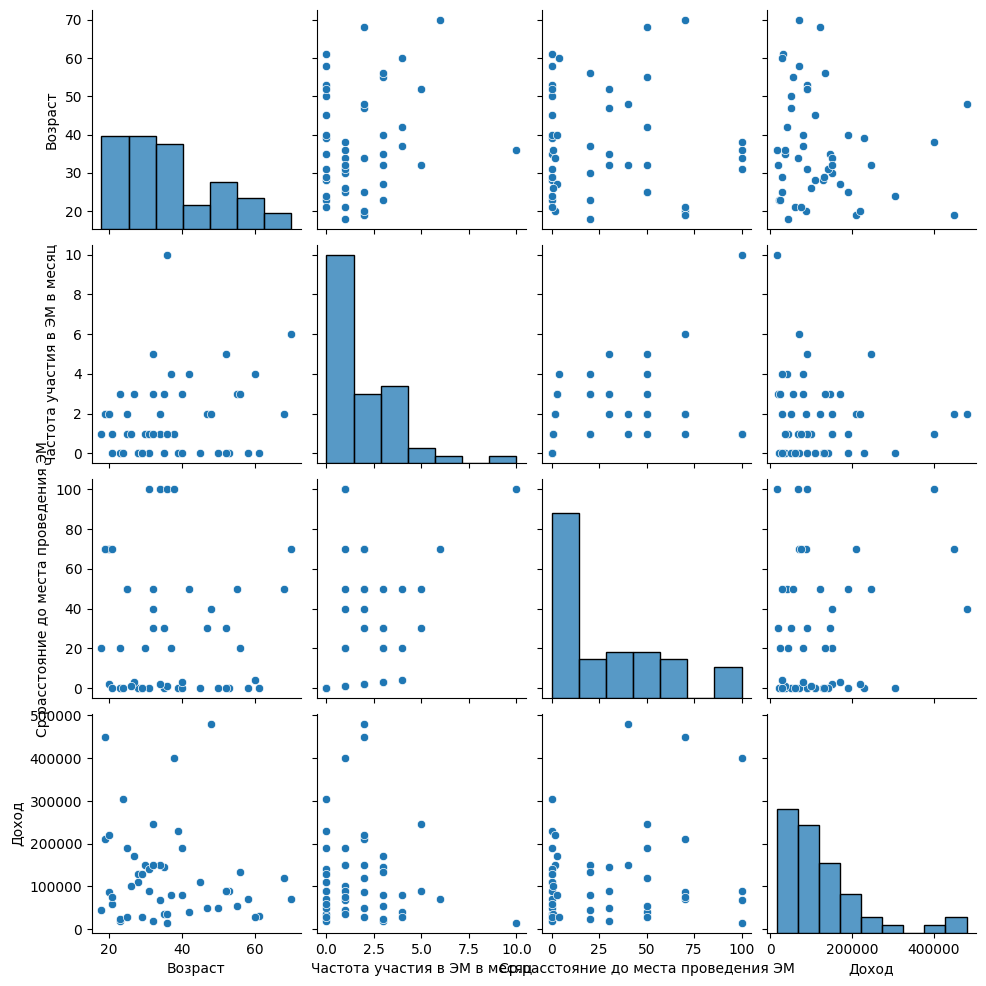

In [61]:
# для предварительного анализа следует начать с построения диаграмм рассеивания
sns.pairplot(df[lst_columns])

In [62]:
# расчет парных коэффициентов корреляции

df[lst_columns].corr()
#Наблюдается слабая положительная корреляция между такими признаками как возраст
#  с частотой участия в ЭМ в месяц.Также отмечается отрицальная коррляция между
# такими признаками как возраст с расстоянием до места проведения ЭМ и доходом.
# Промежуточный вывод:чем старше человек тем реже он участвует в ЭМ  и также в ЭМ,которые находятся не в шаговой доступности.

,Возраст,Частота участия в ЭМ в месяц,Ср.расстояние до места проведения ЭМ,Доход
Возраст,1.000000,0.196054,-0.062601,-0.160254
Частота участия в ЭМ в месяц,0.196054,1.000000,0.472407,-0.098641
Ср.расстояние до места проведения ЭМ,-0.062601,0.472407,1.000000,0.188202
Доход,-0.160254,-0.098641,0.188202,1.000000


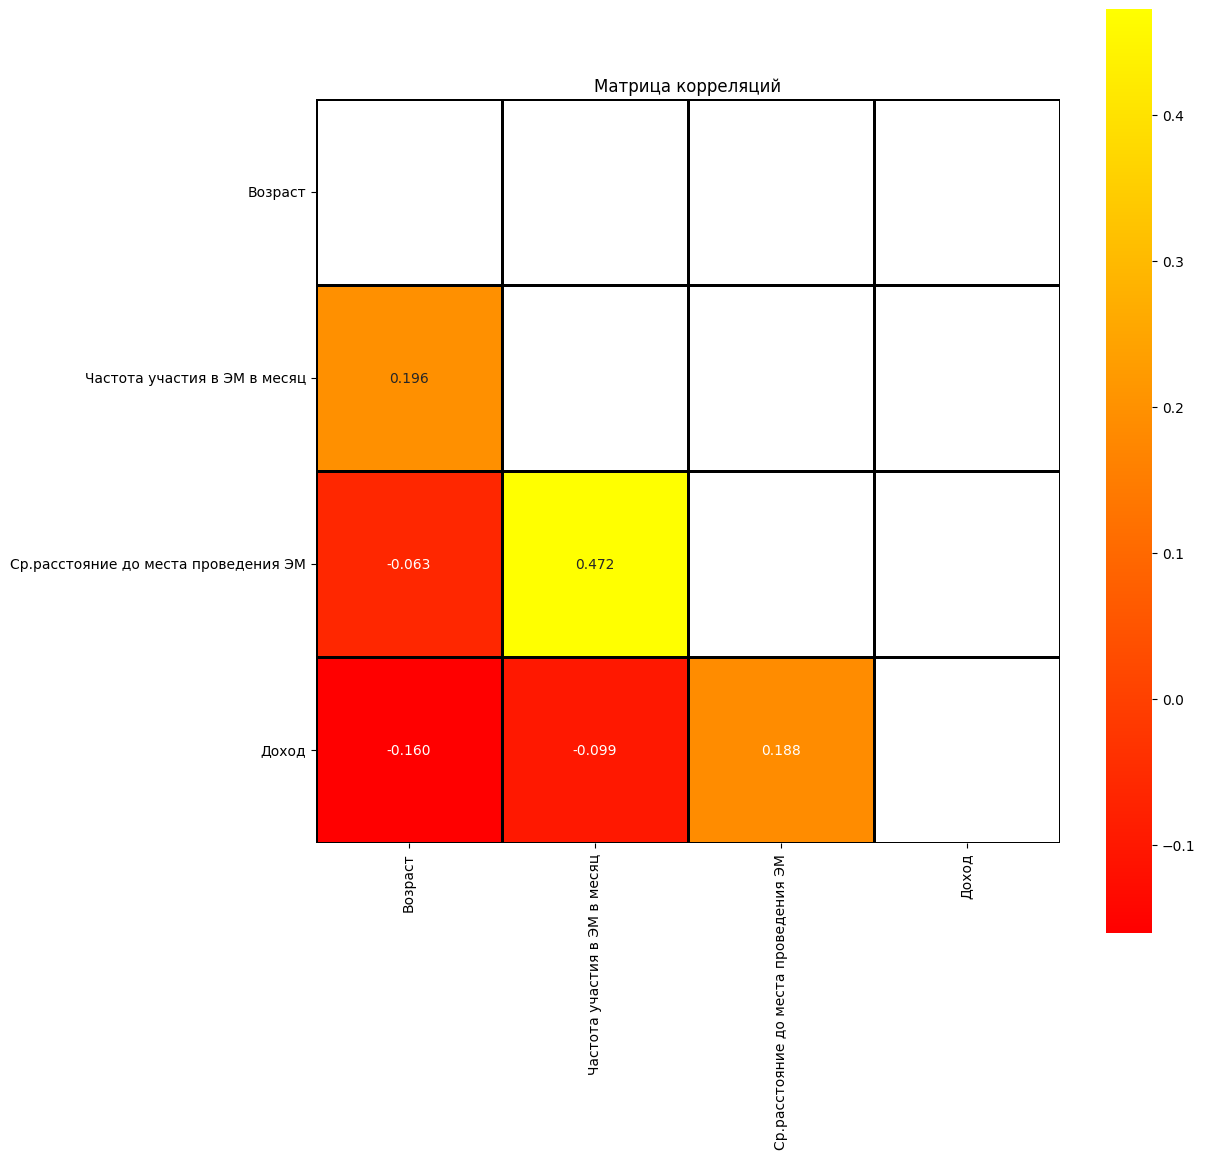

In [64]:
# Построим матрицу корреляции и сравним зависимость переменных
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df[lst_columns].corr(),
                 annot=True,
                 square=True,
                 cmap='autumn',
                 fmt='.3f',
                 linewidths=1,
                 linecolor='black',
                 mask=np.triu(df[lst_columns].corr()))
plt.title('Матрица корреляций')
plt.show()




In [65]:
# Шаг 4. Отбор признаков и портреты клиентов:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Гендер                                50 non-null     object 
 1   Возраст                               50 non-null     int64  
 2   Семейное положение                    50 non-null     object 
 3   Наличие детей                         50 non-null     object 
 4   Частота участия в ЭМ в месяц          50 non-null     float64
 5   Ср.расстояние до места проведения ЭМ  50 non-null     int64  
 6   Образование                           50 non-null     object 
 7   Доход                                 50 non-null     int64  
 8   Участие в соц.сетях                   50 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [66]:
# проверяем гипотезу о нормальности исследуемых случайных величин
# H_0: распределения случайных исследуемых величин не отличаются от нормального
# H_1: распределения случайных исследуемых величин отличны от нормального

# критерий Шапиро
alpha = 0.05
shapiro(df['Доход'])

# вывод
# т.к. pvalue < alpha = 0.05, то гипотезу H_0  отвергаем,
# т.е. распределение случайной величины -- участие в ЭМ --  отличается от нормального

ShapiroResult(statistic=0.8099272440367018, pvalue=1.4960113601440935e-06)

In [67]:
#Расчет статистики теста на основе выборочных данных
stat, p = shapiro(df['Доход'].dropna())
print( 'Statistics\n(W)= %e,\n p = %e' % ( stat, p ) )

Statistics
(W)= 8.099272e-01,
 p = 1.496011e-06


In [68]:
# перейдем теперь к проверке гипотез относительно параметров распределений:
# 2. тк распределение случайной величины отличается от нормального, то с помощью
# критерия Манна-Уитни проверяем гипотезу о равенстве выборочных средних.

# Критерий для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно
alpha = 0.05
# Н_0: Доход не влияет на часоту в ЭМ

# Н_1: Доход влияет на частоту участия в ЭМ


mannwhitneyu((df['Доход']),(df['Частота участия в ЭМ в месяц']))
#тк у нас pvalue=5.3998208436256436e-18< alpha = 0.05 гипотезу Н_0  отвергаем
# т.е.Клиенты с доходом выше среднего чаще участвуют в ЭМ


MannwhitneyuResult(statistic=2500.0, pvalue=5.3998208436256436e-18)

 **Выводы и меры для популяризации экомероприятий и увеличения использования платформы:**

1.   Персонализированные рекомендации:Можно использовать данные о частоте участия в мероприятиях и расстоянии до места их проведения,чтобы рекомендовать пользователям мероприятия,которые могут быть для них наиболее интересны и удобны по местоположению.
2.   Сегментация аудитории:На основе возраста,образования и дохода можно создать сегменты аудитории и предлагать мероприятия,соответствующие интересам и возможностям разных групп.
3.   Бонусная система.Можно внедрить систему баллов и вознаграждений за активное участие в мерроприятиях.Пользователи могут получать бонусы за регулярное участие, что может стимулировать их активность и вовлеченность.
4.   Образовательные кампании.
5.   Анализ обратной связи.Можно внедрить механизм для сбора отзывов о мероприятиях и об использовании платформы, для последующего учлучшения качества и актуальности предлагаемых событий.
6.   Гибкость в участии.Возможность предлагать гибкие варианты участия,такие как онлайн-мероприятия или записи,чтобы привлечь тех,кто не может посещать события лично из-за расстояния или других ограничений.

---



**Эти шаги могут помочь увеличить вовлеченность пользователей и популяризовать экоплатформу,делая ее более привлекательной и удобной для разных категорий граждан**



